In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#***Exercise 1: Harris Corner Detection***

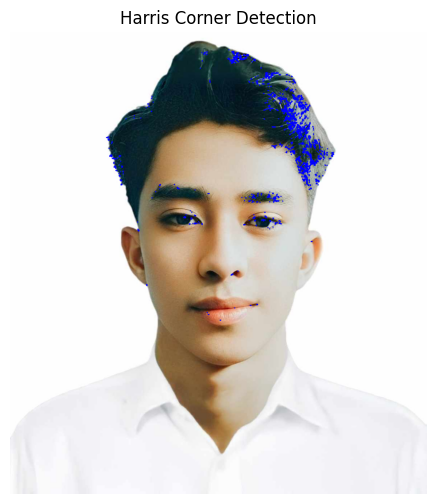

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/IMAGES/original_image1.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to float32
gray_float = np.float32(gray_image)

# Apply Harris Corner Detection
corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Result is dilated for marking the corners
corners_dilated = cv2.dilate(corners, None)

# Threshold for an optimal value, marking corners
threshold = 0.01 * corners_dilated.max()
image[corners_dilated > threshold] = [255, 0, 0]  # Mark corners in red

# Display the original image with corners
plt.figure(figsize=(10, 6))
plt.title('Harris Corner Detection')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')
plt.show()


#***Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction***

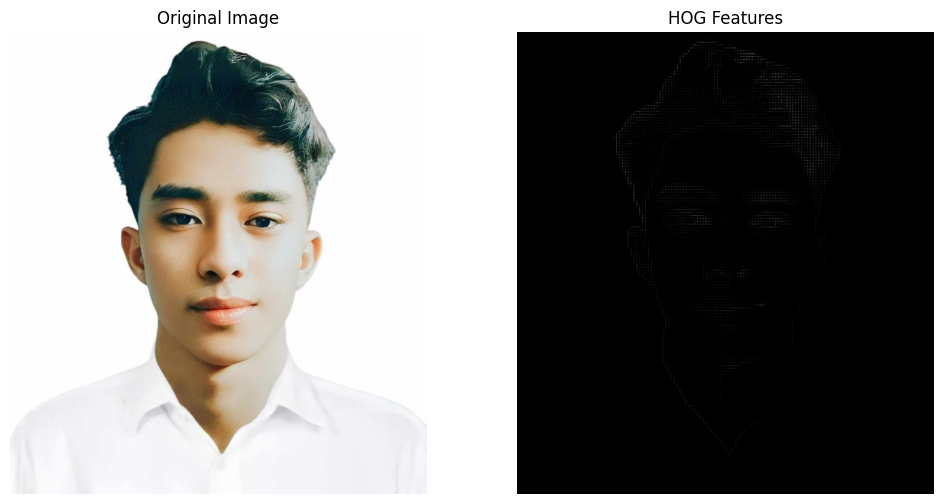

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image
image_path = '/content/drive/MyDrive/IMAGES/original_image1.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract HOG features and the HOG image
hog_features, hog_image = hog(
        gray_image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True,
        transform_sqrt=True
    )

# Rescale the HOG image to enhance visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the original image and HOG visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('HOG Features')
plt.imshow(hog_image_rescaled, cmap='gray')
plt.axis('off')

plt.show()


#***Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection***

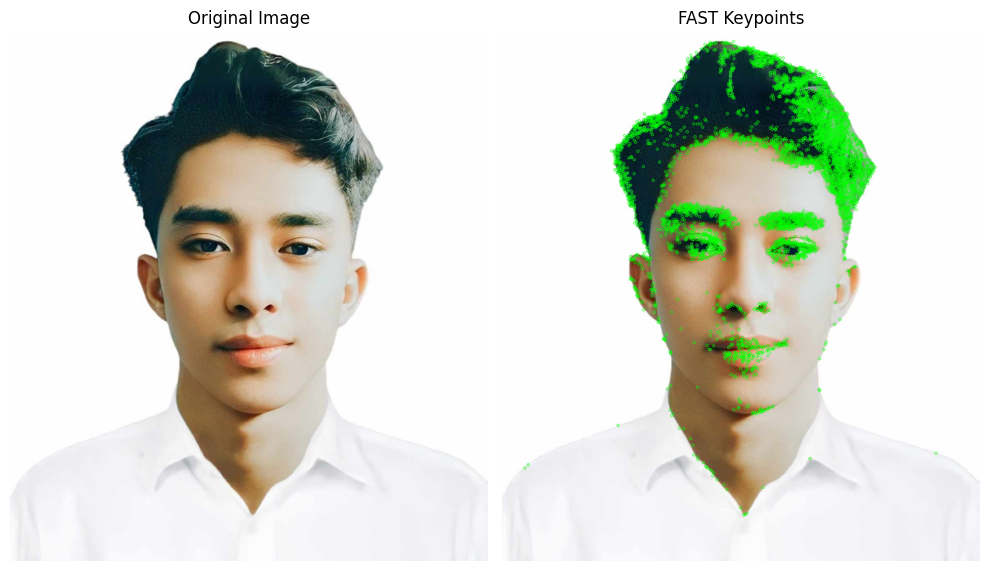

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/IMAGES/original_image1.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize FAST detector
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(gray_image, None)

# Draw keypoints on the original image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Display the original image and the image with keypoints
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('FAST Keypoints')
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.tight_layout()
plt.show()


#***Exercise 4: Feature Matching using ORB and FLANN***

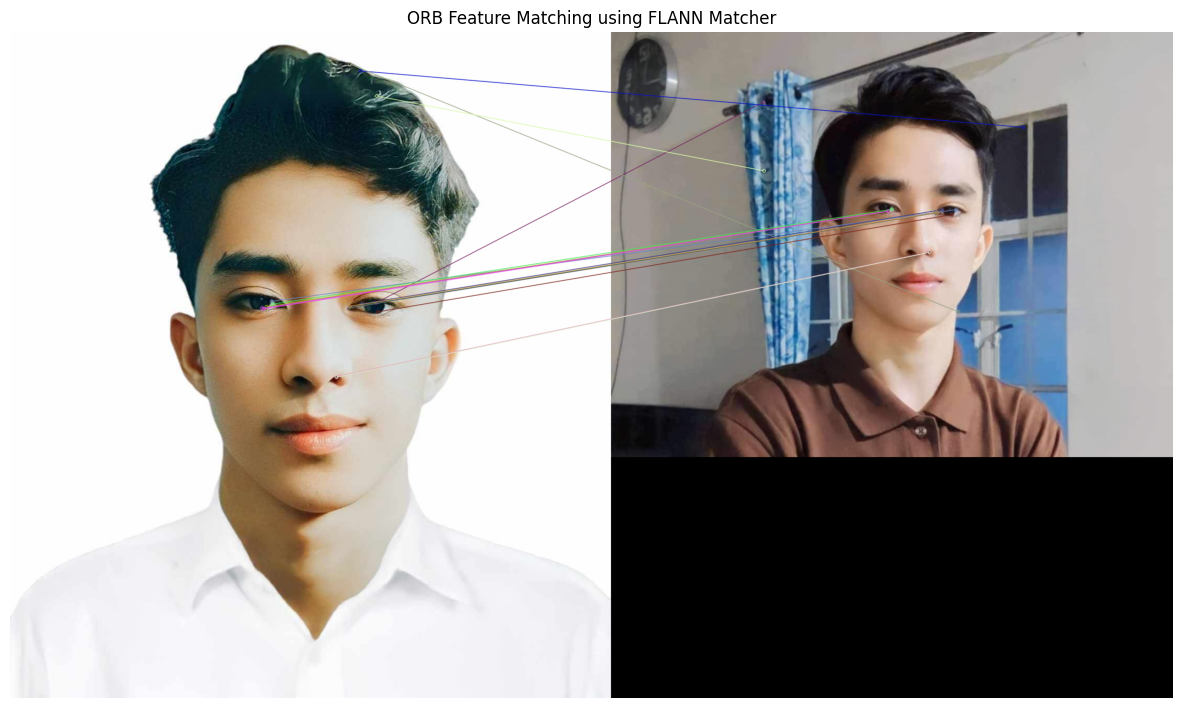

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the two images
image_path1 = '/content/drive/MyDrive/IMAGES/original_image1.jpg'
image_path2 = '/content/drive/MyDrive/IMAGES/original_image2.jpg'

image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Set up FLANN parameters
index_params = dict(algorithm=6,  # FLANN_INDEX_LSH
                    table_number=6,  # 12
                    key_size=12,     # 20
                    multi_probe_level=1)  # 2
search_params = dict(checks=50)  # or pass an empty dictionary

# Initialize the FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors using KNN
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Store all the good matches as per Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
plt.figure(figsize=(15, 10))
plt.title('ORB Feature Matching using FLANN Matcher')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')
plt.show()


#***Exercise 5: Image Segmentation using Watershed Algorithm***

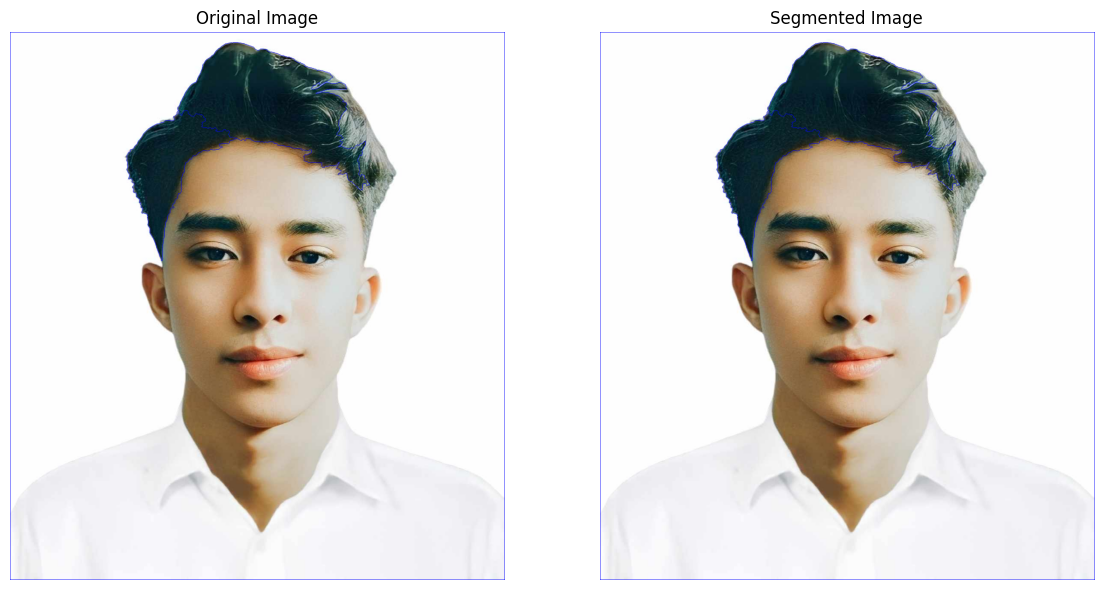

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/IMAGES/original_image1.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to the grayscale image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0 but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply the Watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark the boundaries with red color

# Display the original image and the segmented image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.tight_layout()
plt.show()
